<a href="https://colab.research.google.com/github/vladimiralencar/DeepLearning-LANA/blob/master/LSTM/LSTM_Ana%CC%81lise_de_Sentimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Inteligência Artificial Para Análise de Sentimentos com LSTMs

Neste Mini-Projeto examinaremos como aplicar técnicas de Deep Learning à tarefa de análise de sentimento. A análise de sentimento pode ser pensada como o exercício de receber uma frase, parágrafo, documento ou qualquer linguagem natural e determinar se o tom emocional desse texto é positivo, negativo ou neutro.

Antes de entrar nos detalhes, vamos discutir as razões pelas quais o aprendizado profundo se encaixa nas tarefas de Processamento de Linguagem Natural.

## Deep Learning e NLP 

O Processamento de Linguagem Natural é a criação de sistemas que processam ou "entendem" o idioma para executar determinadas tarefas. Essas tarefas podem incluir:

* Responder Perguntas - O principal trabalho de tecnologias como Siri, Alexa e Cortana
* Análise de Sentimento - Determinar o tom emocional por trás de um texto
* Mapeamento de Texto a Partir de Imagens - Gerar uma legenda para uma imagem 
* Tradução Automática - Traduzir um parágrafo de texto para outro idioma
* Reconhecimento de Voz - Reconhecimento de palavras faladas

Antes mesmo da Era do Deep Learning, o PLN já era um campo próspero que via muitos avanços diferentes. No entanto, em todos os êxitos nas tarefas acima mencionadas, era necessário fazer muita engenharia de recursos e, portanto, ter muito conhecimento em linguística e os praticantes precisavam se sentir confortáveis com termos como fonemas e morfemas. Nos últimos anos, o aprendizado profundo teve um progresso incrível e eliminou amplamente o requisito de um forte conhecimento de domínio. Como resultado da menor barreira à entrada, as aplicações para tarefas de PLN se tornaram uma das maiores áreas de pesquisa com Deep Learning.

# Word Vectors

Para entender como a aprendizagem profunda pode ser aplicada, pense em todas as diferentes formas de dados que são usadas como insumos em modelos de aprendizagem de máquina ou aprendizagem profunda. As redes neurais convolucionais usam matrizes de valores de pixels, a regressão logística usa recursos quantificáveis e os modelos de aprendizado por reforço usam sinais de recompensa. O tema comum é que as insumos precisam ser valores escalares, ou matrizes de valores escalares. Quando você pensa em tarefas de PLN, no entanto, um pipeline de dados como este pode vir à mente.
 
![caption](https://github.com/vladimiralencar/DeepLearning-LANA/raw/master/LSTM/images/SentimentAnalysis.png)

Este tipo de pipeline é problemático. Não há como fazer operações comuns como dot product ou backpropagation em uma única string. Em vez de ter uma entrada de string, precisamos converter cada palavra na frase em um vetor.

![caption](https://github.com/vladimiralencar/DeepLearning-LANA/raw/master/LSTM/images/SentimentAnalysis2.png)

Você pode pensar na entrada do módulo de análise de sentimento como sendo uma matriz dimensional de 16 x D.

Queremos que esses vetores sejam criados de tal forma que representem a palavra e seu contexto, significado e semântica. Por exemplo, gostaríamos que os vetores para as palavras "amor" e "adorar" residissem em relativamente a mesma área no espaço vetorial, uma vez que ambos possuem definições semelhantes e ambos são usados em contextos semelhantes. A representação vetorial de uma palavra também é conhecida como word embedding.

![caption](https://github.com/vladimiralencar/DeepLearning-LANA/raw/master/LSTM/images/SentimentAnalysis8.png)

# Word2Vec

Para criar estes word embeddings, usaremos um modelo chamado "Word2Vec". Esse modelo cria vetores de palavras, observando o contexto com o qual as palavras aparecem nas frases. As palavras com contextos semelhantes serão colocadas próximas no espaço vetorial. Em linguagem natural, o contexto das palavras pode ser muito importante ao tentar determinar seus significados. Tomando nosso exemplo anterior das palavras "adorar" e "amar", considere os tipos de frases em que encontraríamos essas palavras.

![caption](https://github.com/vladimiralencar/DeepLearning-LANA/raw/master/LSTM/images/SentimentAnalysis9.png)

Do contexto das frases, podemos ver que ambas as palavras são geralmente usadas em frases com conotações positivas e geralmente precedem nomes ou frases nominais. Esta é uma indicação de que ambas as palavras têm algo em comum e possivelmente podem ser sinônimos. O contexto também é muito importante quando se considera a estrutura gramatical em frases. A maioria das frases seguirá os paradigmas tradicionais de ter verbos seguindo os substantivos, os adjetivos precedem os substantivos, e assim por diante. Por esse motivo, o modelo é mais propenso a posicionar substantivos na mesma área geral que outros substantivos. O modelo possui um grande conjunto de dados de frases (Wikipédia em inglês, por exemplo) e produz vetores para cada palavra única no corpus. A saída de um modelo Word2Vec é chamada de embedding matrix.

![caption](https://github.com/vladimiralencar/DeepLearning-LANA/raw/master/LSTM/images/SentimentAnalysis3.png)

Esta embedding matrix conterá vetores para cada palavra distinta no corpus de treinamento. Tradicionalmente, as matrizes embedding podem conter mais de 3 milhões de vetores de palavras.

O modelo Word2Vec é treinado com cada frase no conjunto de dados, deslizando uma janela de tamanho fixo sobre ela e tentando prever a palavra central da janela, com as outras palavras. Usando uma função de perda e procedimento de otimização, o modelo gera vetores para cada palavra única. Os detalhes desse procedimento de treinamento podem ser um pouco complicados, então vamos ignorar os detalhes por enquanto, mas o principal ponto aqui é que as entradas em qualquer abordagem de Aprendizagem Profunda para uma tarefa de PLN provavelmente terá vetores de palavras como entrada.

Para obter mais informações sobre a teoria por trás do Word2Vec e como você cria seus próprios embeddings, confira este [tutorial](https://www.tensorflow.org/tutorials/word2vec) do Tensorflow. Veremos isso em mais detalhes no curso de Processamento de Linguagem Natural.

# Recurrent Neural Networks (RNNs)

Agora que temos nossos vetores de palavras como entrada, vejamos a arquitetura de rede que vamos construir. O aspecto único dos dados de PLN é que existe um aspecto temporal. Cada palavra em uma frase depende muito do que veio antes e vem depois. Para atender a essa dependência, usamos uma rede neural recorrente.

A estrutura de rede neural recorrente é um pouco diferente de uma NN tradicional de feedforward que você já está acostumado a ver. A rede feedforward consiste em nós de entrada, unidades ocultas e nós de saída.

A principal diferença entre as redes neurais feedforward e as recorrentes é o aspecto temporal. Em RNNs, cada palavra em uma sequência de entrada será associada a um passo de tempo específico. O número de etapas de tempo será igual ao comprimento máximo da sequência.

![caption](https://github.com/vladimiralencar/DeepLearning-LANA/raw/master/LSTM/images/SentimentAnalysis18.png)

Associado a cada passo de tempo há também um novo componente chamado vetor de estado oculto ht. A partir de um nível elevado, este vetor procura encapsular e resumir toda a informação que foi vista nas etapas do tempo anterior. Assim como xt é um vetor que encapsula todas as informações de uma palavra específica, ht é um vetor que resume informações de etapas de tempo anteriores.

O estado oculto é uma função do vetor de palavras atual e do vetor de estado oculto no passo de tempo anterior. O sigma indica que a soma dos dois termos será colocada através de uma função de ativação.

![caption](https://github.com/vladimiralencar/DeepLearning-LANA/raw/master/LSTM/images/SentimentAnalysis15.png)

Os 2 "W" na fórmula acima representam matrizes de peso. Se você olhar atentamente, verá que há uma matriz de peso WX que vamos multiplicar com nossa entrada, e há uma matriz de peso recorrente WH que é multiplicado com o vetor de estado oculto no passo de tempo anterior. WH é uma matriz que permanece igual em todos os passos de tempo, e a matriz de peso WX é diferente para cada entrada.

A magnitude dessas matrizes de peso afeta a quantidade que o vetor de estado oculto é afetado pelo vetor atual ou o estado oculto anterior. Como um exercício, dê uma olhada na fórmula acima e considere como ht mudaria se WX ou WH tivessem grandes ou pequenos valores.

Vejamos um exemplo rápido. Quando a magnitude de WH é grande e a magnitude de WX é pequena, sabemos que ht é amplamente afetado por ht-1 e não é afetado por xt. Em outras palavras, o atual vetor de estado oculto vê que a palavra atual é em grande parte inconsequente para o resumo geral da frase, e, portanto, assumirá principalmente o mesmo valor que o vetor na etapa anterior.

As matrizes de peso são atualizadas através de um processo de otimização chamado Backpropagation Through Time (BPTT).

O vetor de estado oculto no passo de tempo final é alimentado em um classificador softmax binário onde é multiplicado por outra matriz de peso e colocada através de uma função softmax que produz valores entre 0 e 1, efetivamente nos dando as probabilidades de sentimentos positivos e negativos.

![caption](https://github.com/vladimiralencar/DeepLearning-LANA/raw/master/LSTM/images/SentimentAnalysis16.png)

# Long Short Term Memory Units (LSTMs) 

As LSTMs são módulos que adicionamos às RNNs. Esses módulos garantem que o vetor de estado oculto h seja capaz de encapsular informações sobre dependências de longo prazo no texto. Como vimos na seção anterior, a formulação para h em RNNs tradicionais é relativamente simples. Essa abordagem não conseguirá efetivamente conectar informações que são separadas por mais de alguns passos de tempo. Podemos ilustrar essa ideia de lidar com dependências de longo prazo através de um exemplo pergunta/resposta. Vejamos o exemplo a seguir.

![caption](https://github.com/vladimiralencar/DeepLearning-LANA/raw/master/LSTM/images/SentimentAnalysis4.png)

Aqui, vemos que a frase do meio (The dog ran in the backyard) não teve impacto na pergunta que foi feita. No entanto, existe uma forte conexão entre a primeira e a terceira frases. Com um RNN clássico, o vetor de estado oculto no final da rede pode ter armazenado mais informações sobre a frase do cão do que sobre a primeira frase sobre o número. Basicamente, a adição de unidades LSTM permite determinar a informação correta e útil que precisa ser armazenada no vetor de estado oculto.

Olhando para as unidades LSTM de um ponto de vista mais técnico, as unidades recebem o vetor de palavras atual xt e exibem o vetor de estado oculto ht. Nessas unidades, a formulação para ht será um pouco mais complexa do que a de uma RNN típica. O cálculo é dividido em 4 componentes, um portão de entrada, um portão de esquecimento, um portão de saída e um novo recipiente de memória.

![caption](https://github.com/vladimiralencar/DeepLearning-LANA/raw/master/LSTM/images/SentimentAnalysis10.png)

Cada portão receberá xt e ht-1 (não mostrado na imagem) como entradas e executará algumas computações sobre elas para obter estados intermediários. Cada estado intermediário é alimentado em diferentes tubulações e, eventualmente, a informação é agregada para formar ht. Vale ressaltar que cada um desses portões pode ser considerado como diferentes módulos dentro do LSTM e cada um tem funções diferentes. O portão de entrada determina a quantidade de ênfase a colocar em cada uma das entradas, o portão de esquecimento determina a informação que descartaremos, e o portão de saída determinará o ht baseado nos estados intermediários. 

Olhando para o primeiro exemplo com a pergunta "Qual é a soma dos dois números?", O modelo teria que ser treinado em tipos e perguntas semelhantes. As unidades LSTM poderiam então perceber que qualquer frase sem números provavelmente não teria impacto na resposta à pergunta e, portanto, a unidade poderá utilizar seu portão de esquecimento para descartar as informações desnecessárias sobre o cão e, ao contrário, manter as informações relativas aos números.

## Análise de Sentimento como um Problema de Deep Learning

A análise de sentimento envolve a entrada de uma sequência de palavras e a determinação de que o sentimento é positivo, negativo ou neutro. Podemos separar esta tarefa específica (e a maioria das outras tarefas de PLN) em 5 componentes diferentes.

  * 1) Treinar um modelo de geração de vetor de palavras (como Word2Vec) ou carregar vetores de palavras pré-treinados
  * 2) Criar uma matriz de ID para o nosso conjunto de treinamento 
  * 3) Criar o grafo RNN (com unidades LSTM)
  * 4) Treinamento
  * 5) Teste

## Carregando os Dados

Primeiro, queremos criar nossos vetores de palavras. Por simplicidade, vamos usar um modelo pré-treinado.

O Google conseguiu treinar um modelo Word2Vec https://code.google.com/archive/p/word2vec/#Pre-trained_word_and_phrase_vectors em um conjunto de dados maciço do Google News que continha mais de 100 bilhões de palavras diferentes! A partir desse modelo, o Google foi capaz de criar 3 milhões de vetores de palavras, cada um com uma dimensionalidade de 300.

Em um cenário ideal, usaríamos esses vetores mas, como a matriz de vetores de palavras é bastante grande (3.6 GB), usaremos uma matriz muito mais gerenciável usando [GloVe] http://nlp.stanford.edu/projects/glove, um modelo de geração de vetor de palavras semelhantes. A matriz conterá 400.000 vetores de palavras, cada um com uma dimensionalidade de 50.

Vamos importar duas estruturas de dados diferentes, uma será uma lista Python com as 400.000 palavras, e uma será uma matriz embedding com dimensão de 400.000 x 50 que contenha todos os valores de vetor de palavras.

In [1]:
# carrega os arquivos do servidor, depois junta os pedaços e descompacta
!rm -Rf training_data
!rm -Rf negativeReviews
!rm -Rf positiveReviews
!rm sample_data
!rm *

!wget https://github.com/vladimiralencar/DeepLearning-LANA/raw/master/LSTM/data/s-training_dataaa
!wget https://github.com/vladimiralencar/DeepLearning-LANA/raw/master/LSTM/data/s-training_dataab
!wget https://github.com/vladimiralencar/DeepLearning-LANA/raw/master/LSTM/data/s-training_dataac
!wget https://github.com/vladimiralencar/DeepLearning-LANA/raw/master/LSTM/data/s-training_dataad
!cat s-tr* > training_data.tar.gz
!tar xzf training_data.tar.gz

rm: cannot remove 'sample_data': Is a directory
rm: cannot remove 'sample_data': Is a directory
--2019-01-24 13:26:16--  https://github.com/vladimiralencar/DeepLearning-LANA/raw/master/LSTM/data/s-training_dataaa
Resolving github.com (github.com)... 192.30.253.113, 192.30.253.112
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/LSTM/data/s-training_dataaa [following]
--2019-01-24 13:26:16--  https://raw.githubusercontent.com/vladimiralencar/DeepLearning-LANA/master/LSTM/data/s-training_dataaa
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25000000 (24M) [application/octet-stream]
Saving to: ‘s-training_data

In [2]:
!ls -ilah 

total 314M
 1048583 drwxr-xr-x 1 root root 4.0K Jan 24 13:26 .
16908290 drwxr-xr-x 1 root root 4.0K Jan 24 13:02 ..
 1048584 drwxr-xr-x 1 root root 4.0K Jan  8 17:14 .config
 7627939 -rw-r--r-- 1 1000 1000  24M Mar 13  2017 idsMatrix.npy
 7615438 drwxr-xr-x 2 1000 1000 344K Apr 12  2011 negativeReviews
 7602937 drwxr-xr-x 2 1000 1000 368K Apr 12  2011 positiveReviews
17956872 drwxr-xr-x 1 root root 4.0K Jan  8 17:15 sample_data
 7602931 -rw-r--r-- 1 root root  24M Jan 24 13:26 s-training_dataaa
 7602933 -rw-r--r-- 1 root root  24M Jan 24 13:26 s-training_dataab
 7602934 -rw-r--r-- 1 root root  24M Jan 24 13:26 s-training_dataac
 7602935 -rw-r--r-- 1 root root  23M Jan 24 13:26 s-training_dataad
 7602936 -rw-r--r-- 1 root root  94M Jan 24 13:26 training_data.tar.gz
 7627940 -rw-r--r-- 1 1000 1000  26M Mar 13  2017 wordsList.npy
 7627941 -rw-r--r-- 1 1000 1000  77M Mar 23  2017 wordVectors.npy


In [5]:
# Carrega a lista de palavras
import numpy as np
wordsList = np.load('wordsList.npy')
print('Lista de Palavras Carregada!')
wordsList = wordsList.tolist() 
wordsList = [word.decode('UTF-8') for word in wordsList] 
wordsList[:10]

Lista de Palavras Carregada!


['0', ',', '.', 'of', 'to', 'and', 'in', 'a', '"', "'s"]

In [6]:
# Carrega os vetores
wordVectors = np.load('wordVectors.npy')
print ('Vetores de Palavras Carregados!')
wordVectors[:3]

Vetores de Palavras Carregados!


array([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
       [ 1.3441e-02,  2.3682e-01, -1.6899e-01,  4.0951e-01,  6.3812e-01,
         4.7709e-01, -4.2852e-01, -5.5641e-01, -3.6400e-01, -2.3938e-01,
         1.3001e-01, -6.3734e-02, -3.9575e-01, -4.8162e-01,  2.3291e-01,
         9.0201e-02, -1.3324e-01,  7.8639e-02, -4.

Apenas para ter certeza de que tudo foi carregado corretamente, podemos observar as dimensões da lista de palavras e a matriz de embeddings.

In [7]:
print(len(wordsList))
print(wordVectors.shape)

400000
(400000, 50)


Também podemos pesquisar nossa lista de palavras para uma palavra como "baseball" e, em seguida, acessar seu vetor correspondente através da matriz de embeddings.

In [8]:
baseballIndex = wordsList.index('baseball')
wordVectors[baseballIndex]

array([-1.9327  ,  1.0421  , -0.78515 ,  0.91033 ,  0.22711 , -0.62158 ,
       -1.6493  ,  0.07686 , -0.5868  ,  0.058831,  0.35628 ,  0.68916 ,
       -0.50598 ,  0.70473 ,  1.2664  , -0.40031 , -0.020687,  0.80863 ,
       -0.90566 , -0.074054, -0.87675 , -0.6291  , -0.12685 ,  0.11524 ,
       -0.55685 , -1.6826  , -0.26291 ,  0.22632 ,  0.713   , -1.0828  ,
        2.1231  ,  0.49869 ,  0.066711, -0.48226 , -0.17897 ,  0.47699 ,
        0.16384 ,  0.16537 , -0.11506 , -0.15962 , -0.94926 , -0.42833 ,
       -0.59457 ,  1.3566  , -0.27506 ,  0.19918 , -0.36008 ,  0.55667 ,
       -0.70315 ,  0.17157 ], dtype=float32)

Agora que temos nossos vetores, nosso primeiro passo é pegar uma sentença de entrada e depois construir a sua representação vetorial. Digamos que temos a frase de entrada "I thought the movie was incredible and inspiring". Para obter o vetor das palavras, podemos usar a função de pesquisa de embedding do Tensorflow. Esta função assume dois argumentos, um para a matriz de embeddings (a matriz de vetores de palavras no nosso caso) e um para os ids de cada uma das palavras. O vetor de ids pode ser pensado como a representação integrada do conjunto de treinamento. Este é basicamente apenas o índice de linhas de cada uma das palavras. Vejamos um exemplo rápido para tornar isso concreto.

In [9]:
import tensorflow as tf

# Comprimento máximo da sentença
maxSeqLength = 10 

# Dimensão para cada vetor de palavras
numDimensions = 300 

firstSentence = np.zeros((maxSeqLength), dtype='int32')
firstSentence[0] = wordsList.index("i")
firstSentence[1] = wordsList.index("thought")
firstSentence[2] = wordsList.index("the")
firstSentence[3] = wordsList.index("movie")
firstSentence[4] = wordsList.index("was")
firstSentence[5] = wordsList.index("incredible")
firstSentence[6] = wordsList.index("and")
firstSentence[7] = wordsList.index("inspiring")

# firstSentence[8] e firstSentence[9] serão 0
print(firstSentence.shape)

# Mostra o índice de linha para cada palavra
print(firstSentence) 

(10,)
[    41    804 201534   1005     15   7446      5  13767      0      0]


O pipeline de dados pode ser ilustrado abaixo.

**bold text**![caption](https://github.com/vladimiralencar/DeepLearning-LANA/raw/master/LSTM/images/SentimentAnalysis5.png)

A saída de 10 x 50 deve conter os vetores de palavras de 50 dimensões para cada uma das 10 palavras da sequência.

In [10]:
with tf.Session() as sess:
    print(tf.nn.embedding_lookup(wordVectors,firstSentence).eval().shape)

(10, 50)


Antes de criar a matriz de ids para todo o conjunto de treinamento, vamos primeiro visualizar o tipo de dados que temos. Isso nos ajudará a determinar o melhor valor para definir nosso comprimento máximo de sequência. No exemplo anterior, usamos um comprimento máximo de 10, mas esse valor depende em grande parte das entradas que você possui.

O conjunto de treinamento que vamos usar é o conjunto de dados da análise de filmes do Imdb. Este conjunto tem 25.000 avaliações de filmes, com 12.500 avaliações positivas e 12.500 críticas negativas. Cada uma das avaliações é armazenada em um arquivo txt que precisamos analisar. Os comentários positivos são armazenados em um diretório e as avaliações negativas são armazenadas em outro. O código a seguir determinará o número total e médio de palavras em cada avaliação.

In [11]:
from os import listdir
from os.path import isfile, join

positiveFiles = ['positiveReviews/' + f for f in listdir('positiveReviews/') 
                 if isfile(join('positiveReviews/', f))]
negativeFiles = ['negativeReviews/' + f for f in listdir('negativeReviews/') 
                 if isfile(join('negativeReviews/', f))]
numWords = []

for pf in positiveFiles:
    with open(pf, "r", encoding='utf-8') as f:
        line=f.readline()
        counter = len(line.split())
        numWords.append(counter)       
print('Arquivos positivos concluídos')

for nf in negativeFiles:
    with open(nf, "r", encoding='utf-8') as f:
        line=f.readline()
        counter = len(line.split())
        numWords.append(counter)  
print('Arquivos negativos concluídos')

numFiles = len(numWords)
print('O número total de arquivos é ', numFiles)
print('O número total de palavras nos arquivos é ', sum(numWords))
print('O número médio de palavras nos arquivos é ', sum(numWords)/len(numWords))

Arquivos positivos concluídos
Arquivos negativos concluídos
O número total de arquivos é  25000
O número total de palavras nos arquivos é  5844680
O número médio de palavras nos arquivos é  233.7872


Podemos usar a biblioteca Matplotlib para visualizar esses dados em um formato de histograma.

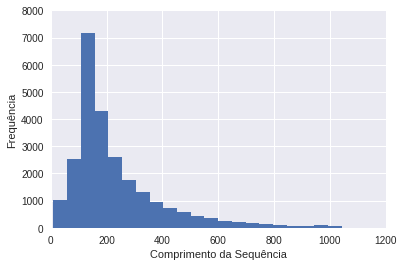

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(numWords, 50)
plt.xlabel('Comprimento da Sequência')
plt.ylabel('Frequência')
plt.axis([0, 1200, 0, 8000])
plt.show()

A partir do histograma, bem como o número médio de palavras por arquivo, podemos dizer com segurança que a maioria das avaliações será inferior a 250 palavras, que é o valor máximo do comprimento da sequência que vamos definir.

In [0]:
maxSeqLength = 250

Vamos ver como podemos obter um único arquivo e transformá-lo em nossa matriz de ids. Isto é o que parece um dos comentários no formato de arquivo de texto:

In [14]:
# Pode usar qualquer índice válido(não apenas 3)
fname = positiveFiles[3] 
with open(fname) as f:
    for lines in f:
        print(lines)
        exit

This film is stunningly beautiful. Goldsworthy's art really benefits with the medium of film because you can see the art at its most beautiful, moving and changing and blossoming. I strongly recommend this movie to everyone. I can think of nothing else to say about it. It's just the kind of movie you HAVE TO see, because it's so visually compelling and left me very refreshed when I left the theatre.


Agora, vamos converter para uma matriz de ids:

In [0]:
# Remove pontuação, parênteses, pontos de interrogação, etc., e deixa apenas caracteres alfanuméricos
import re
strip_special_chars = re.compile("[^A-Za-z0-9 ]+")

def cleanSentences(string):
    string = string.lower().replace("<br />", " ")
    return re.sub(strip_special_chars, "", string.lower())

In [16]:
firstFile = np.zeros((maxSeqLength), dtype='int32')
with open(fname) as f:
    indexCounter = 0
    line=f.readline()
    cleanedLine = cleanSentences(line)
    split = cleanedLine.split()
    for word in split:
        try:
            firstFile[indexCounter] = wordsList.index(word)
        except ValueError:
            # Vetor para palavras não conhecidas
            firstFile[indexCounter] = 399999 
        indexCounter = indexCounter + 1
firstFile

array([    37,    319,     14,  40709,   3366, 399999,    760,    588,
         1913,     17, 201534,   3185,      3,    319,    113,     81,
           86,    253, 201534,    760,     22,     47,     96,   3366,
         1233,      5,   2803,      5,  39428,     41,   2773,   7546,
           37,   1005,      4,   1402,     41,     86,    269,      3,
          936,   1726,      4,    203,     59,     20,     47,    120,
       201534,    921,      3,   1005,     81,     33,      4,    253,
          113,     47,    100,  16674,   8537,      5,    218,    285,
          191,  40754,     61,     41,    218, 201534,   2496,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
      

Agora, vamos fazer o mesmo para cada uma das nossas 25 mil avaliações. Vamos carregar no conjunto de treinamento e obter uma matriz de 25000 x 250. Este é um processo computacionalmente intensivo, então, em vez de executar tudo, vamos carregar uma matriz de ID pré-computada.

**** ATENÇÃO: Caso queira recriar a matriz de ids, lembre-se que este procedimento é computacionalmente intensivo ****

In [17]:
'''
ids = np.zeros((numFiles, maxSeqLength), dtype='int32')
fileCounter = 0

for pf in positiveFiles:
    with open(pf, "r") as f:
        indexCounter = 0
        line=f.readline()
        cleanedLine = cleanSentences(line)
        split = cleanedLine.split()
        for word in split:
            try:
                ids[fileCounter][indexCounter] = wordsList.index(word)
            except ValueError:
                # Vetor para palavras não conhecidas
                ids[fileCounter][indexCounter] = 399999 
            indexCounter = indexCounter + 1
            if indexCounter >= maxSeqLength:
                break
        fileCounter = fileCounter + 1 

for nf in negativeFiles:
    with open(nf, "r") as f:
        indexCounter = 0
        line=f.readline()
        cleanedLine = cleanSentences(line)
        split = cleanedLine.split()
        for word in split:
            try:
                ids[fileCounter][indexCounter] = wordsList.index(word)
            except ValueError:
                # Vetor para palavras não conhecidas
                ids[fileCounter][indexCounter] = 399999 
            indexCounter = indexCounter + 1
            if indexCounter >= maxSeqLength:
                break
        fileCounter = fileCounter + 1 

np.save('/media/datasets/DeepLearningII/Cap03/training_data/idsMatrix', ids)
'''

'\nids = np.zeros((numFiles, maxSeqLength), dtype=\'int32\')\nfileCounter = 0\n\nfor pf in positiveFiles:\n    with open(pf, "r") as f:\n        indexCounter = 0\n        line=f.readline()\n        cleanedLine = cleanSentences(line)\n        split = cleanedLine.split()\n        for word in split:\n            try:\n                ids[fileCounter][indexCounter] = wordsList.index(word)\n            except ValueError:\n                # Vetor para palavras não conhecidas\n                ids[fileCounter][indexCounter] = 399999 \n            indexCounter = indexCounter + 1\n            if indexCounter >= maxSeqLength:\n                break\n        fileCounter = fileCounter + 1 \n\nfor nf in negativeFiles:\n    with open(nf, "r") as f:\n        indexCounter = 0\n        line=f.readline()\n        cleanedLine = cleanSentences(line)\n        split = cleanedLine.split()\n        for word in split:\n            try:\n                ids[fileCounter][indexCounter] = wordsList.index(word)\n   

In [0]:
# Carregando a matriz de ids já computada
ids = np.load('idsMatrix.npy')

## Funções Auxiliares

Abaixo, temos algumas funções auxiliares que serão úteis ao treinar a rede na etapa posterior.

In [0]:
from random import randint

def getTrainBatch():
    labels = []
    arr = np.zeros([batchSize, maxSeqLength])
    for i in range(batchSize):
        if (i % 2 == 0): 
            num = randint(1,11499)
            labels.append([1,0])
        else:
            num = randint(13499,24999)
            labels.append([0,1])
        arr[i] = ids[num-1:num]
    return arr, labels

def getTestBatch():
    labels = []
    arr = np.zeros([batchSize, maxSeqLength])
    for i in range(batchSize):
        num = randint(11499,13499)
        if (num <= 12499):
            labels.append([1,0])
        else:
            labels.append([0,1])
        arr[i] = ids[num-1:num]
    return arr, labels

## Modelo RNN

Agora, estamos prontos para começar a criar o nosso grafo Tensorflow. Primeiro, precisaremos definir alguns hiperparâmetros, como tamanho do lote, número de unidades LSTM, número de classes de saída e número de iterações de treinamento.

In [0]:
batchSize = 24
lstmUnits = 64
numClasses = 2
iterations = 100000

Tal como acontece com a maioria dos grafos do Tensorflow, agora precisamos especificar dois placeholders, um para as entradas na rede e outro para os rótulos. A parte mais importante sobre a definição desses placeholders é a compreensão de cada uma das suas dimensões.

O placeholder de labels representa um conjunto de valores, cada um [1, 0] ou [0, 1], dependendo se cada exemplo de treinamento é positivo ou negativo. Cada linha no espaço reservado de entrada inteira representa a representação inteira de cada exemplo de treinamento que incluímos em nosso lote.

![caption](https://github.com/vladimiralencar/DeepLearning-LANA/raw/master/LSTM/images/SentimentAnalysis12.png)

In [0]:
import tensorflow as tf
tf.reset_default_graph()

labels = tf.placeholder(tf.float32, [batchSize, numClasses])
input_data = tf.placeholder(tf.int32, [batchSize, maxSeqLength])

Uma vez que temos nosso placeholder de dados de entrada, vamos chamar a função tf.nn.lookup() para obter nossos vetores de palavras. A chamada para essa função retornará um Tensor 3-D do tamanho do lote de dimensionalidade pelo comprimento máximo da sequência por dimensões de vetor de palavras. Para visualizar este tensor 3-D, você pode simplesmente pensar em cada ponto de dados no tensor de entrada como o vetor D dimensional correspondente ao qual ele se refere.

![caption](https://github.com/vladimiralencar/DeepLearning-LANA/raw/master/LSTM/images/SentimentAnalysis13.png)

In [0]:
data = tf.Variable(tf.zeros([batchSize, maxSeqLength, numDimensions]),dtype=tf.float32)
data = tf.nn.embedding_lookup(wordVectors,input_data)

Agora que temos os dados no formato que queremos, vejamos como podemos alimentar esta entrada em uma rede LSTM. Usaremos a função tf.nn.rnn_cell.BasicLSTMCell. Esta função recebe um número inteiro para o número de unidades LSTM que queremos. Este é um dos hiperparâmetros que vai precisar de algum ajuste para descobrir o valor ideal. Em seguida, vamos colocar essa célula LSTM em uma camada de Dropout para ajudar a evitar o overfitting da rede.

Finalmente, alimentaremos tanto a célula LSTM quanto o tensor 3-D com dados de entrada em uma função chamada tf.nn.dynamic_rnn. Esta função é responsável por "desenrolar" toda a rede e criar um caminho para que os dados fluam através do grafo RNN.

In [23]:
lstmCell = tf.contrib.rnn.BasicLSTMCell(lstmUnits)
lstmCell = tf.contrib.rnn.DropoutWrapper(cell=lstmCell, output_keep_prob=0.75)
value, _ = tf.nn.dynamic_rnn(lstmCell, data, dtype=tf.float32)

Instructions for updating:
This class is deprecated, please use tf.nn.rnn_cell.LSTMCell, which supports all the feature this cell currently has. Please replace the existing code with tf.nn.rnn_cell.LSTMCell(name='basic_lstm_cell').


Como observação, outra escolha de arquitetura de rede mais avançada é empilhar várias células LSTM uma sobre a outra (Stacked LSTM). Este é o lugar onde o último vetor de estado oculto do primeiro LSTM alimenta o segundo. Empilhar essas células é uma ótima maneira de ajudar o modelo a reter mais informações de dependência a longo prazo, mas também introduz mais parâmetros no modelo, possivelmente aumentando o tempo de treinamento, a necessidade de exemplos de treinamento adicionais e a chance de overfitting. Para obter mais informações sobre como você pode adicionar LSTMs empilhados ao seu modelo, confira a excelente [documentação] do Tensorflow (https://www.tensorflow.org/tutorials/recurrent#stacking_multiple_lstms).

A primeira saída da função RNN dinâmica pode ser considerada como o último vetor de estado oculto. Este vetor será remodelado e depois multiplicado por uma matriz de peso final e um termo de bias para obter os valores de saída final.

In [0]:
weight = tf.Variable(tf.truncated_normal([lstmUnits, numClasses]))
bias = tf.Variable(tf.constant(0.1, shape=[numClasses]))
value = tf.transpose(value, [1, 0, 2])
last = tf.gather(value, int(value.get_shape()[0]) - 1)
prediction = (tf.matmul(last, weight) + bias)

Em seguida, definiremos as métricas corretas de previsão e precisão para acompanhar o funcionamento da rede. A formulação de predição correta funciona observando o índice do valor máximo dos 2 valores de saída e, em seguida, ver se ele coincide com os rótulos de treinamento.

In [0]:
correctPred = tf.equal(tf.argmax(prediction,1), tf.argmax(labels,1))
accuracy = tf.reduce_mean(tf.cast(correctPred, tf.float32))

Definiremos uma perda padrão de entropia cruzada com uma camada de softmax colocada em cima dos valores de previsão final. Para o otimizador, usaremos Adam e a taxa de aprendizado padrão de .001.

In [26]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=labels))
optimizer = tf.train.AdamOptimizer().minimize(loss)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



Se você quiser usar o Tensorboard para visualizar os valores de perda e precisão, você também pode executar e modificar o seguinte código.

In [0]:
import datetime

tf.summary.scalar('Loss', loss)
tf.summary.scalar('Accuracy', accuracy)
merged = tf.summary.merge_all()
logdir = "tensorboard/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + "/"
writer = tf.summary.FileWriter(logdir, sess.graph)

## Tuning dos Hiperparâmetros

Escolher os valores certos para seus hiperparâmetros é uma parte crucial do treinamento de redes neurais profundas de forma eficaz. Você vai perceber que suas curvas de perda de treinamento podem variar com sua escolha de otimizador (Adam, Adadelta, SGD, etc.), taxa de aprendizado e arquitetura de rede. Com RNNs e LSTMs em particular, alguns outros fatores importantes incluem o número de unidades LSTM e o tamanho da palavra vetores.

* Taxa de Aprendizagem: RNNs são infames por serem difíceis de treinar por causa do grande número de etapas de tempo que eles têm. A taxa de aprendizagem torna-se extremamente importante, uma vez que não queremos que nossos valores de peso flutuem descontroladamente como resultado de uma grande taxa de aprendizado, nem queremos um processo de treinamento lento devido a uma baixa taxa de aprendizado. O valor padrão de 0.001 é um bom lugar para começar. Você deve aumentar esse valor se a perda de treinamento estiver mudando muito devagar e diminuir se a perda for instável.
* Otimizador: não há uma escolha de consenso entre os pesquisadores, mas Adam tem sido amplamente popular por ter a propriedade da taxa de aprendizagem adaptável (tenha em mente que as taxas de aprendizado ótimas podem diferir com a escolha do otimizador).
* Número de unidades LSTM: Este valor depende em grande parte do comprimento médio de seus textos de entrada. Enquanto um número maior de unidades fornece mais expressibilidade para o modelo e permite que o modelo armazene mais informações para textos mais longos, a rede levará mais tempo para treinar e será computacionalmente dispendiosa.
* Tamanho do vetor de palavras: as dimensões para vetores de palavras geralmente variam de 50 a 300. Um tamanho maior significa que o vetor pode encapsular mais informações sobre a palavra, mas você também deve esperar um modelo mais computacionalmente caro.


## Treinamento

A idéia básica do loop de treinamento é que primeiro definimos uma sessão Tensorflow. Então, carregamos um lote de avaliações e os respectivos rótulos associados. Em seguida, chamamos a função `run` da sessão. Esta função tem dois argumentos. O primeiro é chamado de argumento "buscar". Ele define o valor que nos interessa em computação. Queremos que o nosso otimizador seja computado, pois esse é o componente que minimiza a nossa função de perda. O segundo argumento é onde nós inserimos o `feed_dict`. Esta estrutura de dados é onde fornecemos insumos para todos os nossos espaços reservados (placeholders). Precisamos alimentar nosso lote de avaliações e nosso lote de rótulos. Este ciclo é então repetido para um número definido de iterações de treinamento.

Em vez de treinar a rede neste notebook (que levará pelo menos um par de horas), iremos carregar um modelo pré-treinado.

Se você decidir treinar este notebook em sua própria máquina, note que você pode acompanhar seu progresso usando [TensorBoard] (https://www.tensorflow.org/get_started/summaries_and_tensorboard). Enquanto a seguinte célula estiver em execução, use o seu terminal para entrar no diretório que contém este notebook, entre `tensorboard --logdir = tensorboard` e visite http://localhost:6006/ com um navegador para manter o olho no seu progresso de treinamento .

In [28]:
sess = tf.InteractiveSession()
saver = tf.train.Saver()
sess.run(tf.global_variables_initializer())

for i in range(iterations):
    # Próximo Batch de Reviews
    nextBatch, nextBatchLabels = getTrainBatch();
    sess.run(optimizer, {input_data: nextBatch, labels: nextBatchLabels})
   
    # Gravando Sumário para o Tensorboard
    if (i % 50 == 0):
        summary = sess.run(merged, {input_data: nextBatch, labels: nextBatchLabels})
        writer.add_summary(summary, i)

    # Checkpoint a cada 10,000 iterações de treinamento
    if (i % 10000 == 0 and i != 0):
        save_path = saver.save(sess, "models/pretrained_lstm.ckpt", global_step=i)
        print("Salvo em %s" % save_path)
writer.close()

Salvo em models/pretrained_lstm.ckpt-10000
Salvo em models/pretrained_lstm.ckpt-20000
Salvo em models/pretrained_lstm.ckpt-30000
Salvo em models/pretrained_lstm.ckpt-40000
Salvo em models/pretrained_lstm.ckpt-50000
Salvo em models/pretrained_lstm.ckpt-60000
Salvo em models/pretrained_lstm.ckpt-70000
Salvo em models/pretrained_lstm.ckpt-80000
Salvo em models/pretrained_lstm.ckpt-90000


## Carregando um Modelo Pré-treinado

As curvas de precisão e perda de nosso modelo durante o treinamento podem ser encontradas abaixo.

![caption](https://github.com/vladimiralencar/DeepLearning-LANA/raw/master/LSTM/images/SentimentAnalysis6.png)
![caption](https://github.com/vladimiralencar/DeepLearning-LANA/raw/master/LSTM/images/SentimentAnalysis7.png)

Olhando para as curvas de treinamento acima, parece que o treinamento do modelo está indo bem. A perda está diminuindo de forma constante, e a precisão aproxima-se de 100%. No entanto, ao analisar as curvas de treinamento, devemos também prestar especial atenção à possibilidade de o nosso modelo sofrer overfitting o conjunto de dados de treinamento. O overfitting é um fenômeno comum na aprendizagem de máquinas, onde um modelo torna-se tão adequado aos dados de treinamento que perde a capacidade de generalizar para o conjunto de testes. Isso significa que o treinamento de uma rede até alcançar 0 perda de treinamento pode não ser a melhor maneira de obter um modelo preciso que tenha bom desempenho em dados que nunca antes viu. A parada precoce (Early Stopping) é uma técnica intuitiva comumente usada com as redes LSTM para combater esta questão. A ideia básica é que treinamos o modelo em nosso conjunto de treinamento, enquanto também mede seu desempenho no conjunto de testes de vez em quando. Uma vez que o erro de teste para a sua diminuição constante e começa a aumentar em vez disso, interrompemos o treinamento, já que isso é um sinal de que a rede começou a sofrer de overfitting.

Carregar um modelo pré-treinado envolve a definição de outra sessão Tensorflow, criando um objeto Saver e, em seguida, usando esse objeto para chamar a função de restauração. Esta função recebe em 2 argumentos, um para a sessão atual e outro para o nome do modelo salvo.

In [29]:
sess = tf.InteractiveSession()
saver = tf.train.Saver()
saver.restore(sess, tf.train.latest_checkpoint('models'))

INFO:tensorflow:Restoring parameters from models/pretrained_lstm.ckpt-90000


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Então, vamos carregar algumas avaliações de filmes do nosso conjunto de testes.A precisão de cada lote de teste pode ser observada quando você executa o seguinte código.

In [30]:
iterations = 10
for i in range(iterations):
    nextBatch, nextBatchLabels = getTestBatch();
    print("Acurácia para este batch:", (sess.run(accuracy, {input_data: nextBatch, labels: nextBatchLabels})) * 100)

Acurácia para este batch: 70.83333134651184
Acurácia para este batch: 87.5
Acurácia para este batch: 95.83333134651184
Acurácia para este batch: 66.66666865348816
Acurácia para este batch: 91.66666865348816
Acurácia para este batch: 79.16666865348816
Acurácia para este batch: 75.0
Acurácia para este batch: 87.5
Acurácia para este batch: 79.16666865348816
Acurácia para este batch: 79.16666865348816


In [0]:
sess.close()

## Conclusão

Neste Jupyter Notebook, vimos uma abordagem de aprendizado profundo para a análise do sentimento. Analisamos os diferentes componentes envolvidos em todo o pipeline e depois examinamos o processo de construção do código Tensorflow para implementar o modelo na prática. Finalmente, treinamos e testamos o modelo para classificar as críticas dos filmes.

Com a ajuda do Tensorflow, você pode criar seus próprios classificadores de sentimentos para entender as grandes quantidades de linguagem natural do mundo e usar os resultados para formar insights acionáveis. 